# MNIST

In [0]:
### MNIST 설명

# mnist.train : 55,000개 
# mnist.test  : 10,000개
# mnist.validation : 5,000개

## 데이터 : 이미지(xs) & 라벨(ys) 로 구성
# train 데이터 : mnist.train.images & mnist.train.labels 가지고
# test 데이터  : mnist.test.images & mnist.test.labels 를 가진다

# 각 이미지는 28 x 28 픽셀이고, 펼치면 784 개의 벡터가 됨
# 만약 train data 는 [55000, 784] 형태 즉 [이미지, 픽셀]

# 라벨을 one-hot 벡터로 바꾸기 
#  ex) 라벨 3은 [0,0,0,1,0,0,0,0,0,0] 
# 즉 mnist.train.labels는 [55000,10] 이 됨 (숫자 9개여서)

In [0]:
### softmax regression 

# 입력값을 지수화한 뒤 정규화 하는 과정
    # 지수화 : 증거값을 하나 더 추가하면 어떤 가설의 가중치를 곱으로 증가 하는것
    # 정규화

# 소프트맥스는 0 ~ 1 사이 값이며 각 값을 모두 합하면 1이 됨 : 서로 다른 여러 항목 중 하나일 확률을 계산하고자 할 때 적합함

# 1. 입력한데이터가 각 클래스에 속한다는 증거를 수치적으로 계산   
    # 픽셀의 어두운 정도를 가중치해 합한다 (weighted sum)
    # 픽셀이 진하다는 것이 특정 클래스에 속하지 않으면 - , 속하면 +
    
# 2. 계산한 값을 확률로 변환함


In [21]:
# 필요한 패키지 다운로드 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# 데이터 다운로드 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [22]:
# image 데이터 형태
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
# label 데이터 형태
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

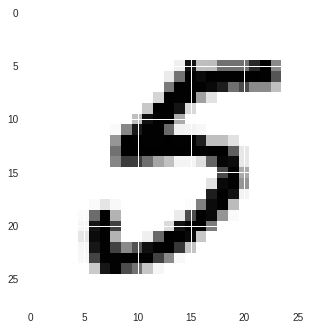

In [26]:
# 데이터가 어떻게 생긴건지 그려보자 
train_images, train_labels = mnist.train.next_batch(1)   # train 데이터셋으로부터 데이터 100개 가져오기. (이미지, label) 튜플
plt.imshow(train_images.reshape(28,28), cmap='Greys')

In [27]:
# train data - image, label 차원
mnist.train.images.shape , mnist.train.labels.shape 

((55000, 784), (55000, 10))

In [28]:
# test data - image, label 차원
mnist.test.images.shape , mnist.test.labels.shape

((10000, 784), (10000, 10))

### DNN

In [0]:
# 머신러닝 모델이 안좋다는 것을 비용, 손실이라고 부르며 우리의 모델이 원하는 결과와 얼마나 떨어져 있는지를 보여줌 - 줄여야 좋은모델
# 손실을 정의하기 위해 cross-entropy 를 정의
# corss - entropy : 우리 예측이 실제값을 설명하기에 얼마나 비효율적인지

### 모델구현

In [0]:
num_hidden1 = 2500
num_hidden2 = 2500
num_hidden3 = 2500
num_hidden4 = 1000
num_hidden5 = 500

x = tf.placeholder(tf.float32, [None, 784])    # x해당  # None : input에 따라 달라질거니까 자리 확보해주세요 
Y = tf.placeholder(tf.float32, [None, 10])    # Y해당  # true value (y) 에 해당
# placeholder : 텐서플로우에서 연산할 때 값을 입력한 자리! 784차원의 벡터로 변형된 MNIST 이미지를

### 1층 
# 만들고자 하는 형태는 z1 = x * W1 + b1 -> return : z1=relu(z1)
W1 = tf.Variable(tf.truncated_normal([784, num_hidden1], mean = 0, stddev = tf.sqrt(2/784) )) #variable이니까 initializing 해야한다.
b1 = tf.Variable(tf.zeros([1,num_hidden1]))  # 1부분이 broad casting 됨
z1 = tf.nn.relu(tf.matmul(x,W1) + b1)

### 2층 
W2 = tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev = tf.sqrt(2/num_hidden1)))  
b2 = tf.Variable(tf.zeros([1,num_hidden2]))    
z2 = tf.nn.relu(tf.matmul(z1,W2) + b2)

### 3층 
W3 = tf.Variable(tf.truncated_normal([num_hidden2, num_hidden3], stddev = tf.sqrt(2/num_hidden2)))  
b3 = tf.Variable(tf.zeros([1,num_hidden3]))    
z3 = tf.nn.relu(tf.matmul(z2,W3) + b3)

### 4층
W4 = tf.Variable(tf.truncated_normal([num_hidden3, num_hidden4], stddev = tf.sqrt(2/num_hidden3)))  
b4 = tf.Variable(tf.zeros([1,num_hidden4]))    
z4 = tf.nn.relu(tf.matmul(z3,W4) + b4)

### 5층 
W5 = tf.Variable(tf.truncated_normal([num_hidden4, num_hidden5], stddev = tf.sqrt(2/num_hidden4)))  
b5 = tf.Variable(tf.zeros([1,num_hidden5]))    
z5 = tf.nn.relu(tf.matmul(z4,W5) + b5)

### 6층 (OUTPUT)
W6 = tf.Variable(tf.truncated_normal([num_hidden5, 10], stddev = tf.sqrt(2/(num_hidden5+10))))
b6 = tf.Variable(tf.zeros([1, 10]))
z6 = tf.nn.softmax(tf.matmul(z5,W6) + b6)

                 
y = tf.nn.softmax(z6) 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y), axis = 1))
train_step = tf.train.AdagradOptimizer(0.05).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(z6, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# reduction_indices = [1]   : y의 두번째 차원의 원소
    # 학습비율 0.5로 Gradient Descent Algorithm적용
    # Gradient Descent

In [29]:

N = 55000
batch_size = 100 
n_batches = N // batch_size   # 몇번 할건지!!!!! 

# 작성하기 전에 작이제까지 작성한 변수들을 초기화해야함!
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


for epoch in range(10): 
    X_, Y_ = shuffle(mnist.train.images, mnist.train.labels)
    
    j = sess.run(accuracy, feed_dict = { x: mnist.train.images, Y: mnist.train.labels })
    print(epoch, j)
    
    for i in range(n_batches):  # 한 데이터당 15번해줘야하니까 
        start = i * batch_size
        end = start + batch_size  # end가 300번보다 많으면 error발생함  # 이렇게해도 300넘지않음
        
        sess.run(train_step, feed_dict = {x : X_[start:end, :], Y : Y_[start:end, :]})
    

0 0.114581816
1 0.85474545
2 0.94412726
3 0.96794546
4 0.9704
5 0.9748727
6 0.9833091
7 0.9861636
8 0.9869818
9 0.98896366


### 모델 평가하기

In [30]:
# 모델 평가하기

my_prediction = tf.cast( tf.argmax(y,1), tf.float32 )    



correct_prediction = tf.equal( tf.argmax(y,1), tf.argmax(Y,1) )  # argmax 몇번째인지 찾아줌
    # tf.argmax(y,1) : 우리 모델이 생각하기에 가장 적합하다고 판단한 라벨
    # tf.argmax(Y,1) : 실제라벨

    # tf.equal 을 통해 우리 예측이 맞았는지 확인가능
    # 부울값으로 이루어진 리스트 얻게 됨 

    # 부동소수점으로 변환후 평균 계산함
    # ex. [T,F,T,T] 는 [1,0,1,1] 이 되며 이 평균을 계산하면 0.75가 됨!
    
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))   

    # correct_prediction 값을 float32 형식으로 변환함

print(sess.run(accuracy, feed_dict={x: mnist.test.images, Y: mnist.test.labels}))


0.9773


In [1]:
#a=sess.run(my_prediction, feed_dict={x: mnist.test.images, Y: mnist.test.labels})
#print(a)
#print(a.shape())

In [19]:
#sess.run(correct_prediction , feed_dict={x: mnist.test.images, Y: mnist.test.labels} )

array([ True,  True,  True, ...,  True,  True,  True])

In [20]:
#tt = my_prediction.eval(session = sess, feed_dict = {x: mnist.test.images, Y: mnist.test.labels})
#
#tt.shape

(10000,)